In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint
from api_keys import api_key

In [2]:
base_url = "https://api.usa.gov/crime/fbi/sapi/api/"

In [3]:
# STATE LEVEL summary-controller

# Setting variable for offense so that you can easily have the URL filter by specific offense type
state_abr = "VA"
st_since = "2000"
st_until = "2019"

# This field can be age, count, ethnicity, race, sex
#nat_variable = "age"
#https://api.usa.gov/crime/fbi/sapi/api/estimates/states/Va/2000/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

# Building query URL
st_query_url = f"{base_url}estimates/states/{state_abr}/{st_since}/{st_until}?API_KEY={api_key}"
st_query_url

'https://api.usa.gov/crime/fbi/sapi/api/estimates/states/VA/2000/2019?API_KEY=cflHyG9x1XDXBgcVSb4tVrfvlJ40CZESdtJRqOVe'

In [4]:
# Getting data
st_fbi_response = requests.get(st_query_url)
st_fbi_json = st_fbi_response.json()
pprint(st_fbi_json)

{'pagination': {'count': 20, 'page': 0, 'pages': 1, 'per_page': 0},
 'results': [{'aggravated_assault': 9984,
              'arson': 833,
              'burglary': 18524,
              'homicide': 470,
              'larceny': 123812,
              'motor_vehicle_theft': 10179,
              'population': 8465207,
              'property_crime': 152515,
              'rape_legacy': None,
              'rape_revised': 3026,
              'robbery': 4331,
              'state_abbr': 'VA',
              'state_id': 51,
              'violent_crime': 17811,
              'year': 2017},
             {'aggravated_assault': 11631,
              'arson': 0,
              'burglary': 30434,
              'homicide': 401,
              'larceny': 146158,
              'motor_vehicle_theft': 17813,
              'population': 7078515,
              'property_crime': 194405,
              'rape_legacy': 1616,
              'rape_revised': None,
              'robbery': 6295,
              'state_a

In [5]:
# Testing if keys are correct to grab the specific data
print(st_fbi_json["results"][0]["year"])

2017


In [7]:
# Creating lists to then later append with data from JSON data
st_year = []
st_population = []
st_agg_assault = []
st_arson = []
st_burglary = []
st_homicide = []
st_larceny = []
st_motor_theft = []
st_prop_crime = []
st_rape_legacy = []
st_rape_revised = []
st_robbery = []
st_violent_crime = []
st_num = 0

for x in st_fbi_json["results"]:
    st_year.append(st_fbi_json["results"][st_num]["year"])
    st_population.append(st_fbi_json["results"][st_num]["population"])
    st_agg_assault.append(st_fbi_json["results"][st_num]["aggravated_assault"])
    st_arson.append(st_fbi_json["results"][st_num]["arson"])
    st_burglary.append(st_fbi_json["results"][st_num]["burglary"])
    st_homicide.append(st_fbi_json["results"][st_num]["homicide"])
    st_larceny.append(st_fbi_json["results"][st_num]["larceny"])
    st_motor_theft.append(st_fbi_json["results"][st_num]["motor_vehicle_theft"])
    st_prop_crime.append(st_fbi_json["results"][st_num]["property_crime"])
    st_rape_legacy.append(st_fbi_json["results"][st_num]["rape_legacy"])
    st_rape_revised.append(st_fbi_json["results"][st_num]["rape_revised"])
    st_robbery.append(st_fbi_json["results"][st_num]["robbery"])
    st_violent_crime.append(st_fbi_json["results"][st_num]["violent_crime"])
    st_num +=1

In [8]:
# Create a dictionary to hold the keys(titles) and lists
st_fbi_dict = {
    "Data Year": st_year,
    "Virginia Population": st_population,
    "Virginia Aggravated Assault": st_agg_assault,
    "Virginia Arson": st_arson,
    "Virginia Burglary": st_burglary,
    "Virginia Homicide": st_homicide,
    "Virginia Larceny": st_larceny,
    "Virginia Motor Vehicle Theft": st_motor_theft,
    "Virginia Property Crime": st_prop_crime,
    "Virginia Rape Legacy": st_rape_legacy,
    "Virginia Rape Revised": st_rape_revised,
    "Virginia Robbery":  st_robbery,
    "Virginia Violent Crime": st_violent_crime
}

st_fbi_df = pd.DataFrame(st_fbi_dict)
st_fbi_df

,Data Year,Virginia Population,Virginia Aggravated Assault,Virginia Arson,Virginia Burglary,Virginia Homicide,Virginia Larceny,Virginia Motor Vehicle Theft,Virginia Property Crime,Virginia Rape Legacy,Virginia Rape Revised,Virginia Robbery,Virginia Violent Crime
0,2017,8465207,9984,833,18524,470,123812,10179,152515,NaN,3026.0,4331,17811
1,2000,7078515,11631,0,30434,401,146158,17813,194405,1616.0,NaN,6295,19943
2,2001,7196750,11945,1813,31604,364,157060,18842,207506,1770.0,NaN,6860,20939
3,2002,7287829,12068,1781,31757,388,157548,18478,207783,1839.0,NaN,6961,21256
4,2003,7365284,11554,1587,29105,416,153367,17977,200449,1807.0,NaN,6713,20490
5,2004,7481332,11503,1648,28759,390,154154,17455,200368,1816.0,NaN,6899,20608
6,2005,7564327,11718,1679,29829,458,154584,15991,200404,1763.0,NaN,7495,21434
7,2006,7642884,11672,1742,32166,403,143292,14799,190257,1829.0,NaN,7779,21683
8,2007,7712091,11131,1673,32028,415,145634,14101,191763,1793.0,NaN,7696,21035
9,2008,7769089,10397,1518,32188,370,151191,13347,196726,1794.0,NaN,7470,20031


In [9]:
# Sorting new data frame by year
st_sorted_df = st_fbi_df.sort_values(by=["Data Year"])
st_sorted_df

,Data Year,Virginia Population,Virginia Aggravated Assault,Virginia Arson,Virginia Burglary,Virginia Homicide,Virginia Larceny,Virginia Motor Vehicle Theft,Virginia Property Crime,Virginia Rape Legacy,Virginia Rape Revised,Virginia Robbery,Virginia Violent Crime
1,2000,7078515,11631,0,30434,401,146158,17813,194405,1616.0,NaN,6295,19943
2,2001,7196750,11945,1813,31604,364,157060,18842,207506,1770.0,NaN,6860,20939
3,2002,7287829,12068,1781,31757,388,157548,18478,207783,1839.0,NaN,6961,21256
4,2003,7365284,11554,1587,29105,416,153367,17977,200449,1807.0,NaN,6713,20490
5,2004,7481332,11503,1648,28759,390,154154,17455,200368,1816.0,NaN,6899,20608
6,2005,7564327,11718,1679,29829,458,154584,15991,200404,1763.0,NaN,7495,21434
7,2006,7642884,11672,1742,32166,403,143292,14799,190257,1829.0,NaN,7779,21683
8,2007,7712091,11131,1673,32028,415,145634,14101,191763,1793.0,NaN,7696,21035
9,2008,7769089,10397,1518,32188,370,151191,13347,196726,1794.0,NaN,7470,20031
10,2009,7882590,9911,1362,31956,370,150374,11690,194020,1572.0,NaN,6342,18195


In [11]:
# Creating a new data frame to use when searching for specific info for graphing
va_year_search_df = st_sorted_df.set_index("Data Year")

In [12]:
# Turning column into a list off the already sorted data frame
va_sorted_list = va_year_search_df["Virginia Aggravated Assault"].tolist()
va_sorted_list

[11631,
 11945,
 12068,
 11554,
 11503,
 11718,
 11672,
 11131,
 10397,
 9911,
 9550,
 8694,
 9131,
 9111,
 9462,
 9357,
 10357,
 9984,
 10258,
 10987]

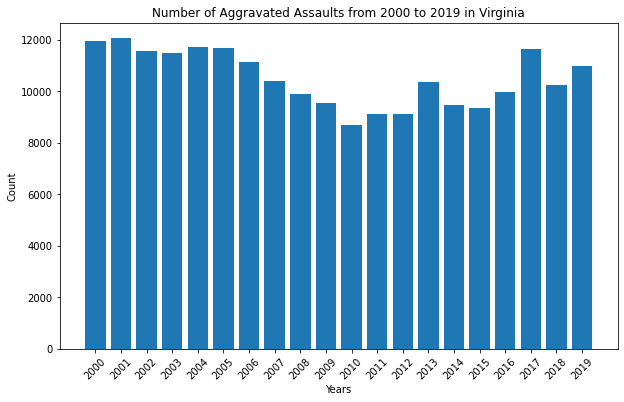

In [13]:
# Graphing info
plt.figure(figsize=(10,6))
plt.bar(st_year, va_sorted_list)
plt.xticks(st_year, rotation=45)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Number of Aggravated Assaults from 2000 to 2019 in Virginia")
plt.show()